# Analyzing interviews
This notebook provides sample [EDSL](https://docs.expectedparrot.com/) code for using a language model to analyze themes and other qualitative content in interviews. The task is designed as a survey about a set of interview transcripts that is answered by a language model, generating responses in the form of a summary dataset.

[EDSL is an open-source library](https://github.com/expectedparrot/edsl) for simulating surveys, experiments and other research with AI agents and large language models. 
Before running the code below, please ensure that you have [installed the EDSL library](https://docs.expectedparrot.com/en/latest/installation.html) and either [activated remote inference](https://docs.expectedparrot.com/en/latest/remote_inference.html) from your [Coop account](https://docs.expectedparrot.com/en/latest/coop.html) or [stored API keys](https://docs.expectedparrot.com/en/latest/api_keys.html) for the language models that you want to use with EDSL. Please also see our [documentation page](https://docs.expectedparrot.com/) for tips and tutorials on getting started using EDSL.

## Example
Say we have a set of exit interview transcripts:

In [1]:
exit_interviews = {
    "id": [
        1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
        11, 12, 13, 14, 15, 16, 17, 18, 19, 20
    ],
    "transcript": [
        "HR Manager: Thank you for meeting with me today. What prompted you to start looking for a new job? Employee: I felt the career advancement opportunities here were quite limited, which has led me to look for roles where I can climb the ladder more quickly.",
        "HR Manager: We're sorry to see you go. Could you share how you felt about the team dynamics here? Employee: The team was fantastic, very supportive. However, the work-life balance was lacking, which is why I've decided to move on.",
        "HR Manager: As you leave, what improvements would you suggest for our company? Employee: I think the company could improve its remote work policies to offer more flexibility, which is crucial nowadays.",
        "HR Manager: Can you describe your satisfaction with your role and responsibilities? Employee: Initially, I was satisfied, but over time, I felt my skills were underutilized, which has led to a decrease in my job satisfaction.",
        "HR Manager: What's the main reason for leaving the company? Employee: I'm looking for new challenges and a change of environment to spark my creativity again, which I felt was stagnating here.",
        "HR Manager: How do you feel about the management style at our company? Employee: The management style is a bit too micromanaging for me, which sometimes hampers my ability to work effectively.",
        "HR Manager: What could have been done differently to improve your experience with us? Employee: More recognition and rewards would have been appreciated. I often felt that my hard work went unnoticed.",
        "HR Manager: What did you appreciate the most during your time here? Employee: I really appreciated the learning opportunities and professional development workshops offered by the company.",
        "HR Manager: Do you feel the company's policies supported your work and personal growth? Employee: To some extent, yes, but I believe the policies on performance evaluations could be more transparent.",
        "HR Manager: Is there anything else you'd like to add about how the company could improve? Employee: I think the company would benefit from more open communication between different departments to streamline projects.",
        "HR Manager: How did you find our company culture? Employee: The culture is good, very collaborative, but it could be less competitive to reduce stress among team members.",
        "HR Manager: Did the company's vision align with your professional goals? Employee: Initially, it did, but as the company shifted focus, I found it less aligned with my career aspirations.",
        "HR Manager: Were there any policies that you found particularly beneficial or restrictive? Employee: The education reimbursement policy was beneficial, but the travel policies were a bit restrictive and outdated.",
        "HR Manager: What are your thoughts on the company's diversity and inclusion efforts? Employee: It's commendable but could definitely be pushed further to create a more inclusive environment.",
        "HR Manager: Can you elaborate on why you feel the need to move on? Employee: I'm seeking a role that offers a higher level of responsibility and more direct impact on strategic decisions.",
        "HR Manager: What feedback do you have about our HR policies? Employee: The HR policies are thorough, but sometimes they are too rigid, which can make adapting to unforeseen circumstances difficult.",
        "HR Manager: How would you describe your overall job satisfaction here? Employee: My job satisfaction was high for the most part, but there were instances where I felt more support from management could have improved my experience.",
        "HR Manager: Did you feel that your achievements were recognized appropriately? Employee: Not always, which is why I think an improved feedback system could help employees feel more valued.",
        "HR Manager: What could we do to retain talent like yourself? Employee: Offering competitive salaries and clearer paths for advancement might help retain employees who are seeking growth.",
        "HR Manager: Thank you for your honesty. We'll certainly take your feedback into consideration to improve. Employee: Thank you, I hope my feedback helps in making this a better workplace."
    ]
}

We want to summarize and quantify the themes and other qualitative content in the interviews. Simple word searches will not suffice, and we do not have bandwidth do this task manually. 

EDSL provides a time- and expense-saving alternative solution: we can use an AI agent to read the transcripts, identify the things that we want to extract from or know about the interviews, and then summarize and quantifying them across the interviews. 

## Designing an AI agent
We start by creating an `Agent` and passing it `traits` that are relevant to the task. We can also include any special instructions:

In [2]:
from edsl import Agent

agent = Agent(
    traits = {"persona": "You are an experienced human resources manager at a software company."}, 
    instruction = "You are reviewing employee exit interviews to identify key themes and topics."
)

## Creating questions about the interviews
Next we create questions about the transcripts for the agent to answer. EDSL comes with a [variety of standard question types](https://docs.expectedparrot.com/en/latest/questions.html) that we can choose from based on the form of the response that we want the model to return (multiple choice, free text, numerical, linear scale, etc.). Here we use free text questions to allow the agent to return unstructured responses. We can use a `{{ placeholder }}` for a transcript in each question text in order to re-run it for each transcript:

In [3]:
from edsl import QuestionFreeText

q_reasons = QuestionFreeText(
    question_name = "reasons",
    question_text = "Identify the interviewee's reasons for leaving: {{ transcript }}"
)

q_policies = QuestionFreeText(
    question_name = "policies",
    question_text = "Identify any feedback on company policies from the interviewee: {{ transcript }}"
)

q_suggestions = QuestionFreeText(
    question_name = "suggestions",
    question_text = "Identify any suggestions for improvements from the interviewee: {{ transcript }}"
)

## Combining questions into a survey
We combine the questions into a `Survey` to administer them all together:

In [4]:
from edsl import Survey

survey = Survey([q_reasons, 
                 q_policies, 
                 q_suggestions])

## Creating scenarios of the questions
Next we create a `Scenario` for each transcript that we will add to the survey when we run it:

In [5]:
from edsl import ScenarioList

scenarios = ScenarioList.from_nested_dict(exit_interviews)

In [6]:
scenarios

ScenarioList([Scenario({'id': 1, 'transcript': 'HR Manager: Thank you for meeting with me today. What prompted you to start looking for a new job? Employee: I felt the career advancement opportunities here were quite limited, which has led me to look for roles where I can climb the ladder more quickly.'}), Scenario({'id': 2, 'transcript': "HR Manager: We're sorry to see you go. Could you share how you felt about the team dynamics here? Employee: The team was fantastic, very supportive. However, the work-life balance was lacking, which is why I've decided to move on."}), Scenario({'id': 3, 'transcript': 'HR Manager: As you leave, what improvements would you suggest for our company? Employee: I think the company could improve its remote work policies to offer more flexibility, which is crucial nowadays.'}), Scenario({'id': 4, 'transcript': 'HR Manager: Can you describe your satisfaction with your role and responsibilities? Employee: Initially, I was satisfied, but over time, I felt my skills were underutilized, which has led to a decrease in my job satisfaction.'}), Scenario({'id': 5, 'transcript': "HR Manager: What's the main reason for leaving the company? Employee: I'm looking for new challenges and a change of environment to spark my creativity again, which I felt was stagnating here."}), Scenario({'id': 6, 'transcript': 'HR Manager: How do you feel about the management style at our company? Employee: The management style is a bit too micromanaging for me, which sometimes hampers my ability to work effectively.'}), Scenario({'id': 7, 'transcript': 'HR Manager: What could have been done differently to improve your experience with us? Employee: More recognition and rewards would have been appreciated. I often felt that my hard work went unnoticed.'}), Scenario({'id': 8, 'transcript': 'HR Manager: What did you appreciate the most during your time here? Employee: I really appreciated the learning opportunities and professional development workshops offered by the company.'}), Scenario({'id': 9, 'transcript': "HR Manager: Do you feel the company's policies supported your work and personal growth? Employee: To some extent, yes, but I believe the policies on performance evaluations could be more transparent."}), Scenario({'id': 10, 'transcript': "HR Manager: Is there anything else you'd like to add about how the company could improve? Employee: I think the company would benefit from more open communication between different departments to streamline projects."}), Scenario({'id': 11, 'transcript': 'HR Manager: How did you find our company culture? Employee: The culture is good, very collaborative, but it could be less competitive to reduce stress among team members.'}), Scenario({'id': 12, 'transcript': "HR Manager: Did the company's vision align with your professional goals? Employee: Initially, it did, but as the company shifted focus, I found it less aligned with my career aspirations."}), Scenario({'id': 13, 'transcript': 'HR Manager: Were there any policies that you found particularly beneficial or restrictive? Employee: The education reimbursement policy was beneficial, but the travel policies were a bit restrictive and outdated.'}), Scenario({'id': 14, 'transcript': "HR Manager: What are your thoughts on the company's diversity and inclusion efforts? Employee: It's commendable but could definitely be pushed further to create a more inclusive environment."}), Scenario({'id': 15, 'transcript': "HR Manager: Can you elaborate on why you feel the need to move on? Employee: I'm seeking a role that offers a higher level of responsibility and more direct impact on strategic decisions."}), Scenario({'id': 16, 'transcript': 'HR Manager: What feedback do you have about our HR policies? Employee: The HR policies are thorough, but sometimes they are too rigid, which can make adapting to unforeseen circumstances difficult.'}), Scenario({'id': 17, 'transcript': 'HR Manager: How would you describe your overall job satisfaction here? Employee

## Selecting a language model
EDSL works with many popular models. We can run `Model.available()` to see a current list of available models, and then create `Model` objects for the ones that we want to use. Here we select GPT 4o:

In [7]:
from edsl import Model

In [8]:
# Model.available()

In [9]:
model = Model("gpt-4o")

## Generating responses
We prompt the agent to answer the survey by adding the scenarios, agent and model and then calling the `run()` method. This generates a dataset of `Results` that includes information about the agent, model, scenarios, questions and answers:

In [10]:
results = survey.by(scenarios).by(agent).by(model).run()

## Accessing results
EDSL comes with built-in methods for analyzing results in datasets, data tables, dataframes, SQL queries, and other formats. Here we select the responses for a few of the transcripts to display in a table:

In [11]:
(results
 .sample(5)
 .sort_by("id")
 .select("id", "reasons", "policies", "suggestions")
 .print(format="rich")
)

┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ scenario ┃ answer                          ┃ answer                           ┃ answer                          ┃
┃ .id      ┃ .reasons                        ┃ .policies                        ┃ .suggestions                    ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ 3        │ The interviewee's reason for    │ The employee suggests that the   │ The suggestion for improvement  │
│          │ leaving appears to be related   │ company could improve its remote │ from the interviewee is to      │
│          │ to the company's remote work    │ work policies to offer more      │ enhance the company's remote    │
│          │ policies. They suggest that the │ flexibility. This feedback       │ work policies to provide more   │
│          │ company could improve by        │ highlights the importance of     │ flexibility. This aligns with   │
│          │ offering more flexibility in    │ adapting to modern work trends   │ the growing importance of       │
│          │ this area. This indicates that  │ and accommodating employees'     │ flexible work arrangements in   │
│          │ the current policies may not be │ needs for flexible work          │ today's work environment.       │
│          │ meeting their needs or          │ arrangements.                    │                                 │
│          │ expectations for work-life      │                                  │                                 │
│          │ balance or other personal       │                                  │                                 │
│          │ circumstances.                  │                                  │                                 │
├──────────┼─────────────────────────────────┼──────────────────────────────────┼─────────────────────────────────┤
│ 8        │ The provided dialogue does not  │ The employee's feedback does not │ Based on the provided response  │
│          │ explicitly state the            │ directly address company         │ from the employee, there are no │
│          │ interviewee's reasons for       │ policies. However, their         │ explicit suggestions for        │
│          │ leaving. However, it does       │ appreciation for the learning    │ improvements mentioned. The     │
│          │ highlight that the employee     │ opportunities and professional   │ employee highlighted their      │
│          │ appreciated the learning        │ development workshops suggests   │ appreciation for the learning   │
│          │ opportunities and professional  │ that the company's policies on   │ opportunities and professional  │
│          │ development workshops offered   │ employee development and         │ development workshops, which    │
│          │ by the company. To identify the │ training are positively          │ suggests that these areas are   │
│          │ reasons for leaving, additional │ received. This indicates that    │ strengths of the company.       │
│          │ information from the exit       │ the policies supporting          │                                 │
│          │ interview would be necessary.   │ professional growth are          │ To gather more detailed         │
│          │                                 │ effective and valued by          │ feedback on potential           │
│          │                                 │ employees.                       │ improvements, it might be       │
│          │                                 │                                  │ helpful to ask follow-up        │
│          │                                 │                                  │ questions such as:              │
│          │                                 │                                  │                                 │
│          │                                 │          

## Quantifying themes
We now want to quantify the responses to our original questions. One way to do this is to have an agent review all the responses to each question, create comprehensive lists of themes/topics, and then use the lists as answer options for checkbox versions of the origin questions where the agent is prompted to select the themes/topics in each transcript, generating a summary dataset.

We start by creating a general question prompting an agent to review a set of responses for a question and generate a condensed list of the themes/topics in the responses:

In [12]:
from edsl import QuestionList

q_themes = QuestionList(
    question_name = "themes",
    question_text = """
    Consider the following question that was used to review a set of employee exit interview
    transcripts, together with the set of responses to the question for the transcripts. 
    Draft a list of the key themes/topics in the responses that can be used to quantify them  
    across the transcripts. 
    Question: {{ original_question }} 
    Responses: {{ responses }}
    """,
    max_list_items = 10
)

This question will be parameterized with the original questions and responses that we now want to quantify. This is made easy with a method for transforming survey results into scenarios for new questions:

In [13]:
survey.question_names

['reasons', 'policies', 'suggestions']

In [14]:
from edsl import ScenarioList, Scenario

response_scenarios = []

for question_name in survey.question_names:
    question_text = results.select(f"question_text.{question_name}_question_text").first()
    responses = results.select(f"{question_name}").to_list(flatten=True)
    response_scenarios.append(
        Scenario(
            {
                "question_name": question_name,
                "original_question": question_text,
                "responses": responses
            }
        )
    )

response_scenarios = ScenarioList(response_scenarios)

The braces `{{` `}}` in the original question text will be automatically changed to `<<` `>>` when the question is used as a scenario value; we can also do this explicitly:

In [15]:
response_scenarios = response_scenarios.convert_jinja_braces()
# response_scenarios

In [16]:
themes_results = q_themes.by(response_scenarios).run()

In [17]:
themes_results.select("question_name", "original_question", "themes").print(format="rich")

┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ scenario       ┃ scenario                                       ┃ answer                                        ┃
┃ .question_name ┃ .original_question                             ┃ .themes                                       ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ reasons        │ Identify the interviewee's reasons for         │ ['Lack of career advancement opportunities',  │
│                │ leaving: << transcript >>                      │ 'Lack of work-life balance', 'Dissatisfaction │
│                │                                                │ with remote work policies', 'Underutilization │
│                │                                                │ of skills', 'Desire for new challenges or     │
│                │                                                │ change of environment', 'Dissatisfaction with │
│                │                                                │ management style', 'Lack of recognition and   │
│                │                                                │ rewards', 'Concerns about transparency in     │
│                │                                                │ performance evaluation', 'Stressful           │
│                │                                                │ competitive environment', 'Misalignment       │
│                │                                                │ between professional goals and company        │
│                │                                                │ vision']                                      │
├────────────────┼────────────────────────────────────────────────┼───────────────────────────────────────────────┤
│ policies       │ Identify any feedback on company policies from │ ['Career Advancement Opportunities',          │
│                │ the interviewee: << transcript >>              │ 'Work-Life Balance', 'Remote Work             │
│                │                                                │ Flexibility', 'Recognition and Rewards',      │
│                │                                                │ 'Management Style', 'Inter-Departmental       │
│                │                                                │ Communication', 'Company Culture', 'Vision    │
│                │                                                │ and Strategic Direction', 'Diversity and      │
│                │                                                │ Inclusion', 'HR Policy Flexibility']          │
├────────────────┼────────────────────────────────────────────────┼───────────────────────────────────────────────┤
│ suggestions    │ Identify any suggestions for improvements from │ ['Career Development and Advancement',        │
│                │ the interviewee: << transcript >>              │ 'Work-Life Balance', 'Remote Work             │
│                │                                                │ Flexibility', 'Skill Utilization',            │
│                │                                                │ 'Management Style', 'Recognition and          │
│                │                                                │ Rewards', 'Inter-Departmental Communication', │
│                │                                                │ 'Transparency in Performance Evaluations',    │
│                │                                                │ 'Company Vision Alignment', 'Travel           │
│                │                                                │ Policies']                                    │
└────────────────┴────────────────────────────────────────────────┴───────────────────────────────────────────────┘

Now we can use the lists of themes/topics to rerun the original questions as checkbox questions:

In [18]:
from edsl import QuestionCheckBox

q_reasons_options = QuestionCheckBox(
    question_name = "reasons_options",
    question_text = "Identify the interviewee's reasons for leaving: {{ transcript }}",
    question_options = themes_results.filter("question_name == 'reasons'").select("themes").first() + ["None of these"]
)

q_policies_options = QuestionCheckBox(
    question_name = "policies_options",
    question_text = "Identify any feedback on company policies from the interviewee: {{ transcript }}",
    question_options = themes_results.filter("question_name == 'policies'").select("themes").first() + ["None of these"]
)

q_suggestions_options = QuestionCheckBox(
    question_name = "suggestions_options",
    question_text = "Identify any suggestions for improvements from the interviewee: {{ transcript }}",
    question_options = themes_results.filter("question_name == 'suggestions'").select("themes").first() + ["None of these"]
)

In [19]:
options_survey = Survey([q_reasons_options, q_policies_options, q_suggestions_options])

In [20]:
scenarios = ScenarioList.from_nested_dict(exit_interviews) # same as above

In [21]:
options_results = options_survey.by(scenarios).run()

In [22]:
(options_results
 .sample(5)
 .select("reasons_options", "policies_options", "suggestions_options")
 .print(format="rich")
)

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ answer                              ┃ answer                              ┃ answer                              ┃
┃ .reasons_options                    ┃ .policies_options                   ┃ .suggestions_options                ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ ['Lack of career advancement        │ ['Career Advancement                │ ['Career Development and            │
│ opportunities', 'None of these']    │ Opportunities', 'Recognition and    │ Advancement']                       │
│                                     │ Rewards']                           │                                     │
├─────────────────────────────────────┼─────────────────────────────────────┼─────────────────────────────────────┤
│ ['Lack of work-life balance']       │ ['Work-Life Balance']               │ ['Work-Life Balance']               │
├─────────────────────────────────────┼─────────────────────────────────────┼─────────────────────────────────────┤
│ ['Lack of career advancement        │ ['Career Advancement                │ ['Career Development and            │
│ opportunities']                     │ Opportunities']                     │ Advancement']                       │
├─────────────────────────────────────┼─────────────────────────────────────┼─────────────────────────────────────┤
│ ['Lack of career advancement        │ ['Career Advancement                │ ['Career Development and            │
│ opportunities', 'Desire for new     │ Opportunities', 'Vision and         │ Advancement', 'Company Vision       │
│ challenges or change of             │ Strategic Direction']               │ Alignment']                         │
│ environment', 'Misalignment between │                                     │                                     │
│ professional goals and company      │                                     │                                     │
│ vision']                            │                                     │                                     │
├─────────────────────────────────────┼─────────────────────────────────────┼─────────────────────────────────────┤
│ ['Concerns about transparency in    │ ['Recognition and Rewards', 'HR     │ ['Transparency in Performance       │
│ performance evaluation']            │ Policy Flexibility']                │ Evaluations']                       │
└─────────────────────────────────────┴─────────────────────────────────────┴─────────────────────────────────────┘

In [23]:
df = options_results.select("reasons_options", "policies_options", "suggestions_options").to_pandas(remove_prefix=True)

In [24]:
import pandas as pd
import ast

for question_name in ["reasons_options", "policies_options", "suggestions_options"]:
    df[question_name] = df[question_name].apply(ast.literal_eval)

df.head()

,reasons_options,policies_options,suggestions_options
0,"[Lack of career advancement opportunities, Non...","[Career Advancement Opportunities, Recognition...",[Career Development and Advancement]
1,[Dissatisfaction with management style],[Management Style],[Management Style]
2,[None of these],[Inter-Departmental Communication],[Inter-Departmental Communication]
3,[Desire for new challenges or change of enviro...,"[Career Advancement Opportunities, Company Cul...","[Career Development and Advancement, Skill Uti..."
4,[Lack of work-life balance],[Work-Life Balance],[Work-Life Balance]


In [25]:
from collections import Counter

def count_items_in_column(column):
    item_counts = Counter()
    for row in column:
        item_counts.update(row)
    return dict(item_counts)

column_item_counts = [{col: count_items_in_column(df[col])} for col in df.columns]

column_item_counts

[{'reasons_options': {'Lack of career advancement opportunities': 3,
   'None of these': 7,
   'Dissatisfaction with management style': 2,
   'Desire for new challenges or change of environment': 3,
   'Lack of work-life balance': 1,
   'Dissatisfaction with remote work policies': 1,
   'Lack of recognition and rewards': 2,
   'Concerns about transparency in performance evaluation': 2,
   'Underutilization of skills': 1,
   'Misalignment between professional goals and company vision': 2,
   'Stressful competitive environment': 1}},
 {'policies_options': {'Career Advancement Opportunities': 6,
   'Recognition and Rewards': 4,
   'Management Style': 2,
   'Inter-Departmental Communication': 1,
   'Company Culture': 2,
   'Work-Life Balance': 1,
   'Remote Work Flexibility': 1,
   'HR Policy Flexibility': 3,
   'None of these': 2,
   'Vision and Strategic Direction': 2,
   'Diversity and Inclusion': 1}},
 {'suggestions_options': {'Career Development and Advancement': 6,
   'Management Sty

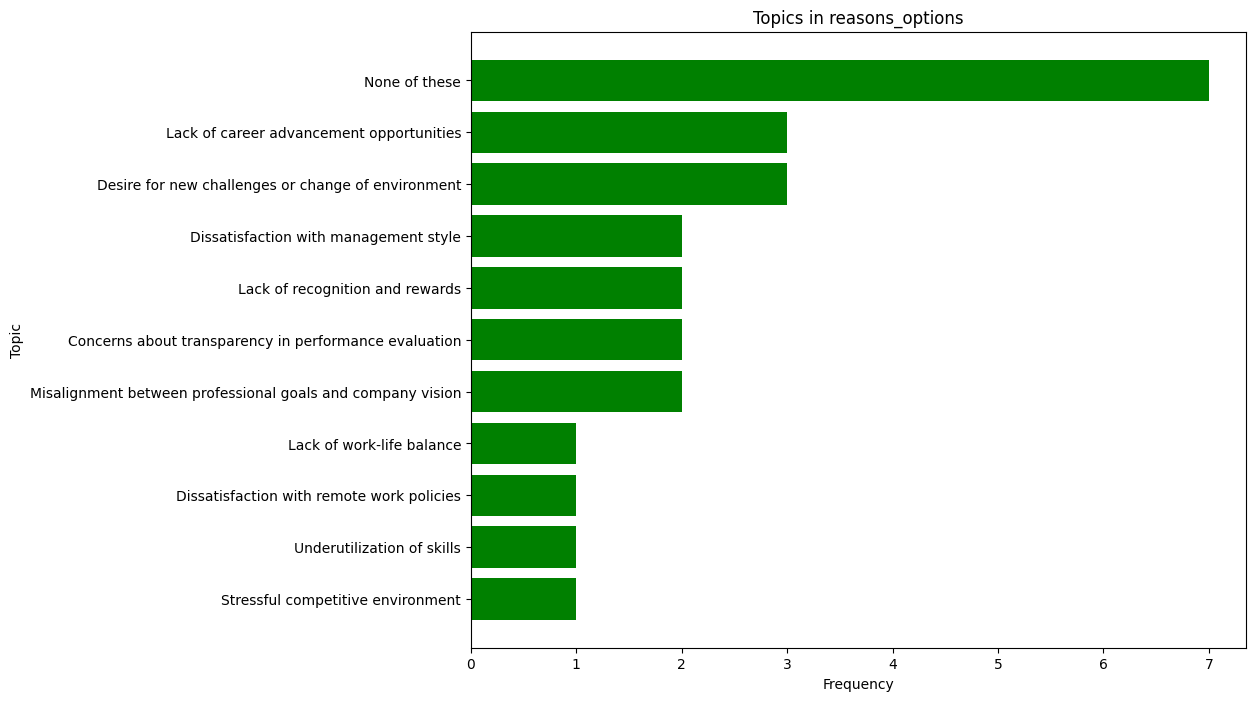

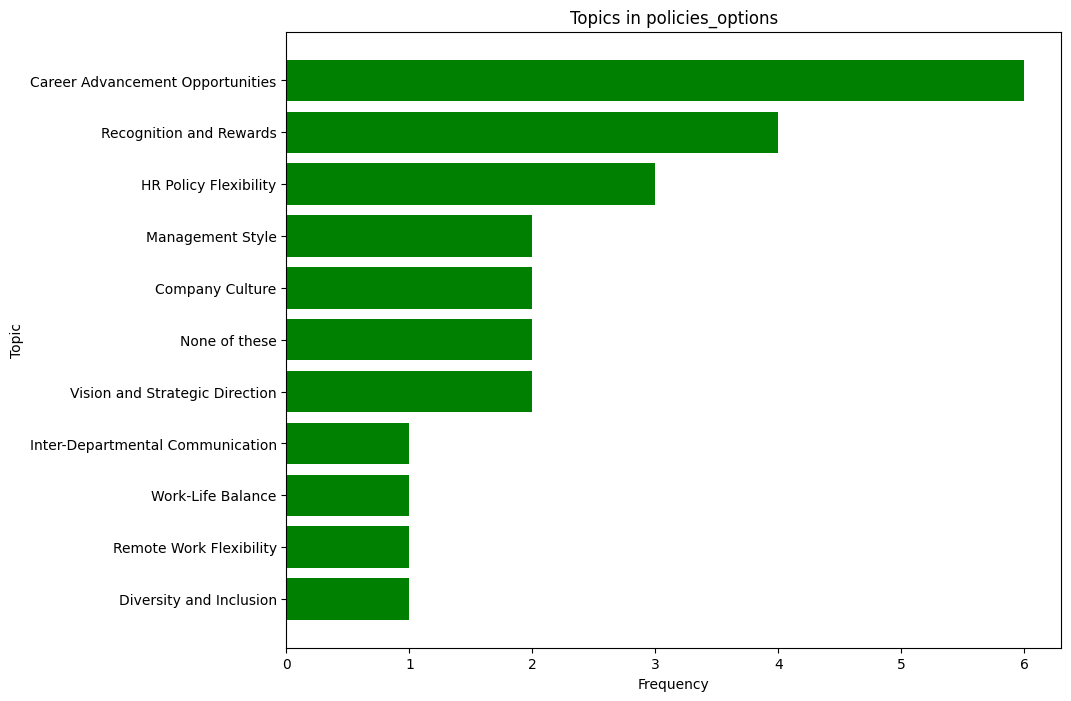

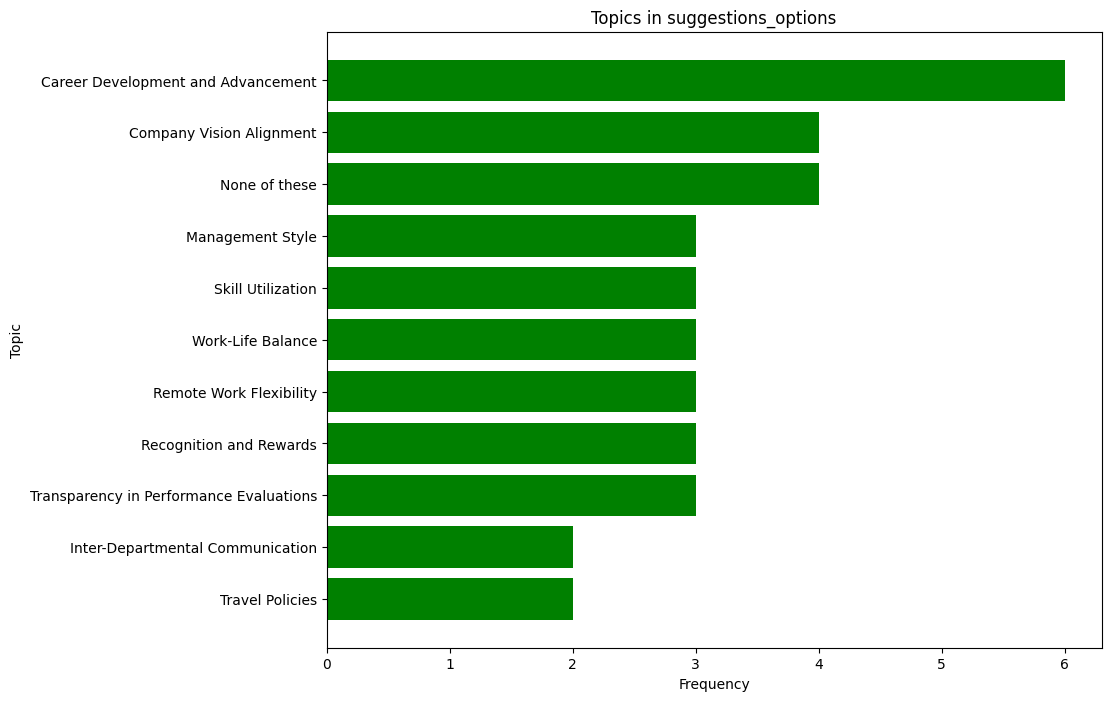

In [26]:
import matplotlib.pyplot as plt

for column_dict in column_item_counts:
    for column_name, counts in column_dict.items():
        items = list(counts.keys())
        frequencies = list(counts.values())
        
        items, frequencies = zip(*sorted(zip(items, frequencies), key=lambda x: x[1], reverse=True))
        
        plt.figure(figsize=(10, 8))
        plt.barh(items, frequencies, color='green')
        plt.xlabel('Frequency')
        plt.ylabel('Topic')
        plt.title(f'Topics in {column_name}')
        plt.gca().invert_yaxis()  
        plt.show()


## Posting to the Coop
The [Coop](https://www.expectedparrot.com/content/explore) is a platform for creating, storing and sharing LLM-based research.
It is fully integrated with EDSL and accessible from your workspace or Coop account page.
Learn more about [creating an account](https://www.expectedparrot.com/login) and [using the Coop](https://docs.expectedparrot.com/en/latest/coop.html).

Here we post this notebook:

In [27]:
from edsl import Notebook

In [28]:
n = Notebook(path = "analyzing_interviews.ipynb")

In [29]:
n.push(description = "Example code for analyzing interview transcripts", visibility = "public")

{'description': 'Example code for analyzing interview transcripts',
 'object_type': 'notebook',
 'url': 'https://www.expectedparrot.com/content/4e419928-437d-4830-9455-18ef4245a80e',
 'uuid': '4e419928-437d-4830-9455-18ef4245a80e',
 'version': '0.1.33.dev1',
 'visibility': 'public'}

To update an object at the Coop:

In [30]:
n = Notebook(path = "analyzing_interviews.ipynb") # resave it

In [31]:
n.patch(uuid = "4e419928-437d-4830-9455-18ef4245a80e", value = n)

{'status': 'success'}